In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/student_clustering.csv")

In [ ]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


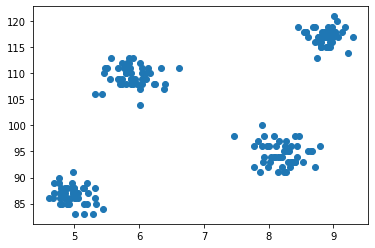

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["iq"])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters = i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 523.7131894763967,
 405.12058406910546,
 295.43918959431915,
 242.5789822081596,
 206.8836519857373,
 176.10962713033308]

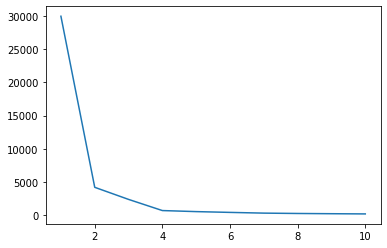

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means.shape

(200,)

In [ ]:
X[y_means == 3,1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

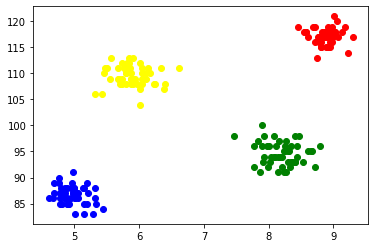

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

## **KMeans on 3D Data**

In [ ]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

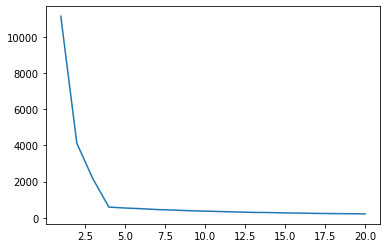

In [ ]:
plt.plot(range(1,21),wcss)

In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

## **KMeans Implementation from Scratch**

In [22]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [2]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]


In [3]:
X,y = make_blobs(n_samples = 100,cluster_std = cluster_std , centers = centroids , n_features=2,random_state=2)

In [34]:
km = KMeans(n_clusters=2,max_iter = 100)
y_means = km.fit_predict(X)

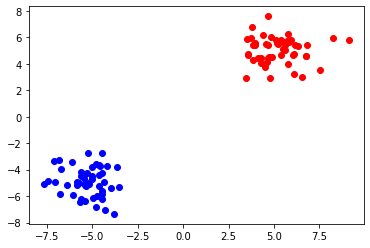

In [35]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')

## **KMeans Class**

In [33]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [ ]:
class KMeans:
  def __init__(self,n_clusters,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
    #select random centroids 
    random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]

    for i in range(self.max_iter):
      #assign cluster 
      cluster_group = self.assign_cluster(X)
      old_centroids = self.centroids
      #move centroid  
      self.centroids = self.move_centroids(X,cluster_group)

      #check   finish
      if(old_centroids == self.centroids).all():
        break
    return cluster_group
     
  def assign_cluster(self,X):
    cluster_group = []
    distances = []
    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroids,row-centroids)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)
   
  def move_centroids(self,X,cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)
    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis=0))
